In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
df1 = pd.read_csv('C:\programowanie\python_mrowa\wdfcs\zad3_xrd_2.txt', delim_whitespace=True, header=None, names=['teta', 'N'])
df1['teta'] = df1['teta'].astype(float)
df1['N'] = df1['N'].astype(float)
print(df1.head())
print(df1.dtypes)

    teta      N
0  20.00  200.0
1  20.01  200.0
2  20.02  200.0
3  20.03  200.0
4  20.04  200.0
teta    float64
N       float64
dtype: object


In [74]:
lam = 1.4767
a = 3.92

df=pd.DataFrame(data={'h': [1,1,1,2,2,2,2,2,2,3,3,3,3,3], 'k': [0,1,1,0,1,1,2,2,2,0,1,1,2,2], 'l': [0,0,1,0,0,1,0,1,2,0,0,1,0,1]})
df['d'] = a/np.sqrt(df['h']**2+df['k']**2+df['l']**2)
def F(h,k,l):
    return np.real(np.round(1+np.exp(2*np.pi*1j*(0.5*h+0.5*k))+np.exp(2*np.pi*1j*(0.5*k+0.5*l))+np.exp(2*np.pi*1j*(0.5*h+0.5*l)), 2))

df['F'] = F(df['h'], df['k'], df['l'])
df['sin(theta)'] = lam/(2*df['d'])
df['2 theta'] = np.arcsin(df['sin(theta)'])*180/np.pi * 2
df_F = df[df['F'] == 4]
df_F

,h,k,l,d,F,sin(theta),2 theta
2,1,1,1,2.263213,4.0,0.326240,38.081400
3,2,0,0,1.960000,4.0,0.376709,44.259981
6,2,2,0,1.385929,4.0,0.532747,64.382526
8,2,2,2,1.131607,4.0,0.652479,81.457607
11,3,1,1,1.181924,4.0,0.624702,77.320565


In [84]:
df

,h,k,l,d,F,sin(theta),2 theta
0,1,0,0,3.920000,0.0,0.188355,21.713551
1,1,1,0,2.771859,0.0,0.266374,30.897179
2,1,1,1,2.263213,4.0,0.326240,38.081400
3,2,0,0,1.960000,4.0,0.376709,44.259981
4,2,1,0,1.753077,0.0,0.421174,49.817417
5,2,1,1,1.600333,0.0,0.461373,54.951434
6,2,2,0,1.385929,4.0,0.532747,64.382526
7,2,2,1,1.306667,0.0,0.565064,68.813440
8,2,2,2,1.131607,4.0,0.652479,81.457607
9,3,0,0,1.306667,0.0,0.565064,68.813440


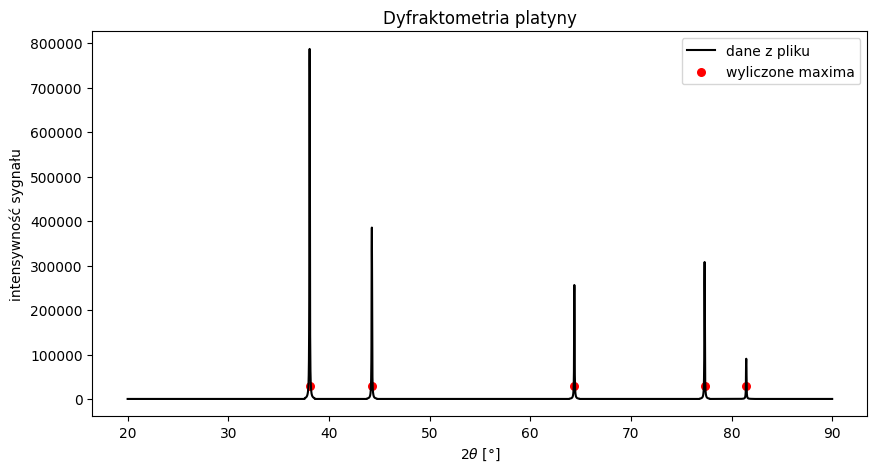

In [83]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df1['teta'], df1['N'], color='black', linestyle='solid', label='dane z pliku')
ax.set_xlabel('2$\\theta$ [\u00b0]')
ax.set_ylabel('intensywność sygnału')
ax.set_title('Dyfraktometria platyny')

ax.scatter(df_F['2 theta'], np.ones(len(df_F))*30000, color='red', marker='o', s=30, label='wyliczone maxima')

ax.legend(loc='upper right')